# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Machine Learning Operations**

**Tecnológico de Monterrey**

Prof Dr. Gerardo Rodríguez Hernández

Fase 1 del proyecto

**Online News**

**Equipo 15:**

*   Cesar Armando Prieto Siller - A01796382
*   Juan Pablo Treviño Lozano - A01197363
*   Scarlet Marie Wessin Romero - A01796242
*   Jorge Roberto Rivera Maldonado - A01796461
*   Jose Francisco Gonzalez Vargas - A01796612








In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [18]:
print(os.getcwd())

c:\Users\priet\OneDrive\Documents\GitHub\MLOpsEq15\notebooks


In [16]:
import os

In [19]:
original_news_df = pd.read_csv('../data/raw/online_news_original.csv')
original_news_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [20]:
news_df = pd.read_csv('../data/raw/online_news_modified.csv')
news_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594466988,0.999999992308,0.815384609112,4.0,2.0,1.0,...,0.7,-0.35,-0.6,-3.4000000000000004,0.5,-0.1875,0.0,0.1875,593.0,bad
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743080614,0.999999993289,0.79194630341,3.0,1.0,1.0,...,0.7,-0.11875,-0.125,-0.1,0.0,0.0,0.5,0.0,711.0,639
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575129530699,0.999999991597,0.66386554064,3.0,1.0,1.0,...,1.0,-0.466666666667,-0.8,-0.133333333333,0.0,0.0,0.5,0.0,1500.0,unknown
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503787877834,0.999999996904,0.665634672862,9.0,0.0,1.0,...,0.8,-0.369696969697,-0.6,-0.166666666667,0.0,0.0,0.5,NaN,1200.0,688
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.41564561695,0.999999998565,0.540889525766,19.0,19.0,20.0,...,1.0,-0.220192307692,error,-0.05,0.454545454545,0.136363636364,0.0454545454545,0.136363636364,505.0,579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40431,http://mashable.com/2014/11/17/fearful-pit-bull/,51.0,10.0,357.0,0.625730992322,0.999999995215,0.827751192212,9.0,0.0,1.0,...,0.6,-0.333333333333,-1.0,-0.0833333333333,0.0,0.0,0.5,0.0,3000.0,335
40432,HTTP://MASHABLE.COM/2014/07/25/LYFTS-NYC-LAUN...,167.0,8.0,792.0,0.494208493572,0.999999998047,0.63476562376,18.0,10.0,2.0,...,0.5,-0.210416666667,-0.8,-0.1,0.0,0.0,0.5,0.0,1500.0,462
40433,http://mashable.com/2014/05/08/furry-friends-s...,245.0,9.0,737.0,0.376955902735,0.999999997712,0.489702516042,20.0,3.0,22.0,...,1.0,-0.159449404762,-0.2,-0.0714285714286,0.0,0.0,0.5,0.0,2900.0,149
40434,http://mashable.com/2013/06/06/prism-tech-comp...,581.0,10.0,408.0,0.54679802821,0.999999996139,0.687258684605,12.0,6.0,1.0,...,0.5,NaN,-0.4,-0.1,0.0,0.0,25.5,0.0,4500.0,NaN


# **Parte 1**. EDA y preprocesamiento

Estadísticas descriptivas de las variables del dataframe.

In [21]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   url                            40027 non-null  object
 1   timedelta                      39994 non-null  object
 2   n_tokens_title                 39976 non-null  object
 3   n_tokens_content               39963 non-null  object
 4   n_unique_tokens                39985 non-null  object
 5   n_non_stop_words               39977 non-null  object
 6   n_non_stop_unique_tokens       39956 non-null  object
 7   num_hrefs                      39986 non-null  object
 8   num_self_hrefs                 39988 non-null  object
 9   num_imgs                       39980 non-null  object
 10  num_videos                     39987 non-null  object
 11  average_token_length           40031 non-null  object
 12  num_keywords                   39981 non-null  object
 13  d

In [44]:
original_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [45]:
news_df.isna().mean()*100

,0
url,1.011475
timedelta,1.093085
n_tokens_title,1.137600
n_tokens_content,1.169750
n_unique_tokens,1.115343
...,...
title_sentiment_polarity,1.201899
abs_title_subjectivity,1.174696
abs_title_sentiment_polarity,1.125235
shares,1.204372


In [46]:
# Create a list to store columns that could not be converted to numeric
failed_conversions = []

# Iterate through the object columns, excluding 'url' and 'mixed_type_col'
# The 'mixed_type_col' is explicitly excluded as it contains mixed types and cannot be fully converted
object_cols_to_check = [col for col in news_df.select_dtypes(include='object').columns if col not in ['url', 'mixed_type_col']]

for col in object_cols_to_check:
    # Attempt to convert to numeric, coercing errors
    news_df[col] = pd.to_numeric(news_df[col], errors='coerce')

display(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            40027 non-null  object 
 1   timedelta                      39839 non-null  float64
 2   n_tokens_title                 39822 non-null  float64
 3   n_tokens_content               39805 non-null  float64
 4   n_unique_tokens                39834 non-null  float64
 5   n_non_stop_words               39855 non-null  float64
 6   n_non_stop_unique_tokens       39799 non-null  float64
 7   num_hrefs                      39839 non-null  float64
 8   num_self_hrefs                 39828 non-null  float64
 9   num_imgs                       39840 non-null  float64
 10  num_videos                     39849 non-null  float64
 11  average_token_length           39902 non-null  float64
 12  num_keywords                   39831 non-null 

None

In [47]:
original_numerical_variables = news_df.select_dtypes(include='number').columns.tolist()
original_numerical_variables

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_ne

In [48]:
numerical_variables = news_df.select_dtypes(include='number').columns.tolist()
numerical_variables

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_ne

In [49]:
categorical_variables = news_df.select_dtypes(include='object').columns.tolist()
categorical_variables

['url', 'mixed_type_col']

**Análisis de variables numéricas:**

In [50]:
original_news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [51]:
news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,3.983900e+04,39822.000000,39805.000000,39834.000000,39855.000000,39799.000000,39839.000000,39828.000000,39840.000000,39849.000000,...,39803.000000,39832.000000,39830.000000,39832.000000,39863.000000,39835.000000,39809.000000,39808.000000,39824.000000,3.980500e+04
mean,5.464119e+02,16.154437,688.481171,3.487791,4.777544,3.778931,16.947840,7.503791,8.427083,4.027956,...,4.038204,3.870614,3.380583,2.916937,2.308050,3.257434,2.582590,4.847005,3.712572,4.374463e+03
std,1.900941e+04,63.285420,3076.999568,44.572238,154.956183,44.781353,81.001544,96.161165,64.738388,43.871419,...,192.956913,45.166853,198.462765,139.456371,40.120403,44.683552,40.442477,252.621555,133.349475,3.526399e+04
min,8.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-91.975000,-1135.200000,-51.300000,0.000000,-59.400000,0.000000,0.000000,1.000000e+00
25%,1.660000e+02,9.000000,247.000000,0.471574,1.000000,0.626667,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.329365,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,9.500000e+02
50%,3.420000e+02,10.000000,413.000000,0.540368,1.000000,0.691630,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253241,-0.500000,-0.100000,0.155556,0.000000,0.500000,0.000000,1.400000e+03
75%,5.470000e+02,12.000000,725.000000,0.610918,1.000000,0.756991,14.000000,4.000000,5.000000,1.000000,...,0.100000,1.000000,-0.185495,-0.300000,-0.050000,0.500000,0.156250,0.500000,0.250000,2.800000e+03
max,3.777888e+06,1679.000000,320522.000000,2677.586775,29682.000000,1053.164544,6806.000000,16416.000000,5915.000000,2250.000000,...,37445.466667,997.900000,38688.380556,26355.200000,998.875000,991.000000,998.500000,42202.500000,20574.000000,5.185800e+06


In [52]:
news_df[numerical_variables].median()

,0
timedelta,342.000000
n_tokens_title,10.000000
n_tokens_content,413.000000
n_unique_tokens,0.540368
n_non_stop_words,1.000000
n_non_stop_unique_tokens,0.691630
num_hrefs,8.000000
num_self_hrefs,3.000000
num_imgs,1.000000
num_videos,0.000000


In [53]:
original_news_df.skew(numeric_only=True)

,0
timedelta,0.120504
n_tokens_title,0.165320
n_tokens_content,2.945422
n_unique_tokens,198.655116
n_non_stop_words,198.792445
n_non_stop_unique_tokens,198.443294
num_hrefs,4.013495
num_self_hrefs,5.172751
num_imgs,3.946596
num_videos,7.019533


In [54]:
original_news_df.kurt(numeric_only=True)

,0
timedelta,-1.257191
n_tokens_title,-0.000750
n_tokens_content,19.478412
n_unique_tokens,39523.832001
n_non_stop_words,39560.294950
n_non_stop_unique_tokens,39467.693708
num_hrefs,35.506333
num_self_hrefs,56.171456
num_imgs,24.525746
num_videos,74.075414


**Análisis de variables categóricas**

In [55]:
original_news_df.describe(include='object')

,url
count,39644
unique,39644
top,http://mashable.com/2014/12/27/youtube-channel...
freq,1


In [56]:
news_df['url'].value_counts()

,count
url,
NAN,17
http://mashable.com/2014/08/05/creative-housewarming-gifts/,2
http://mashable.com/2013/03/05/breakfast-food-famous-art/,2
http://mashable.com/2014/01/27/strange-interview-questions/,2
http://mashable.com/2014/05/01/snapchat-adds-video-chat-instant-messaging/,2
...,...
http://mashable.com/2013/09/21/battery-draining-app/,1
http://mashable.com/2013/09/21/chrome-update-for-ios-7-tempts-users-away-from-apples-native-apps/,1
http://mashable.com/2013/09/21/diet-tips-homer-simpson/,1


In [57]:
news_df['mixed_type_col'].value_counts()

,count
mixed_type_col,
unknown,4034
bad,3949
272,47
688,46
821,44
...,...
334,16
683,14
707,13


## Limpieza de datos



Se calcula e imprime el porcentaje de valores faltantes para cada columna en ambos marcos de datos, identificando las columnas con valores faltantes, se eliminarán las filas con valores faltantes.


In [58]:
missing_percentage = original_news_df.isna().mean() * 100
print("Missing percentage in original_news_df:")
print(missing_percentage)

columns_with_missing = missing_percentage[missing_percentage > 0].index.tolist()
print("\nColumns with missing values in original_news_df:")
print(columns_with_missing)

original_news_df_cleaned = original_news_df.dropna()

missing_percentage_news = news_df.isna().mean() * 100
print("\nMissing percentage in news_df:")
print(missing_percentage_news)

columns_with_missing_news = missing_percentage_news[missing_percentage_news > 0].index.tolist()
print("\nColumns with missing values in news_df:")
print(columns_with_missing_news)

news_df_cleaned = news_df.dropna()

print("\nShape of original_news_df_cleaned:", original_news_df_cleaned.shape)
print("Shape of news_df_cleaned:", news_df_cleaned.shape)

Missing percentage in original_news_df:
url                             0.0
timedelta                       0.0
n_tokens_title                  0.0
n_tokens_content                0.0
n_unique_tokens                 0.0
                               ... 
title_subjectivity              0.0
title_sentiment_polarity        0.0
abs_title_subjectivity          0.0
abs_title_sentiment_polarity    0.0
shares                          0.0
Length: 61, dtype: float64

Columns with missing values in original_news_df:
[]

Missing percentage in news_df:
url                              1.011475
timedelta                        1.476407
n_tokens_title                   1.518449
n_tokens_content                 1.560491
n_unique_tokens                  1.488772
                                  ...    
title_sentiment_polarity         1.550598
abs_title_subjectivity           1.553072
abs_title_sentiment_polarity     1.513503
shares                           1.560491
mixed_type_col                  

Convertir las columnas que tienen datos numericos a tipo numérico.



In [59]:
# Create a list to store columns that could not be converted to numeric
failed_conversions = []

# Iterate through the object columns, excluding 'url' and 'mixed_type_col'
# The 'mixed_type_col' is explicitly excluded as it contains mixed types and cannot be fully converted
object_cols_to_check = [col for col in news_df.select_dtypes(include='object').columns if col not in ['url', 'mixed_type_col']]

for col in object_cols_to_check:
    # Attempt to convert to numeric, coercing errors
    news_df[col] = pd.to_numeric(news_df[col], errors='coerce')

display(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            40027 non-null  object 
 1   timedelta                      39839 non-null  float64
 2   n_tokens_title                 39822 non-null  float64
 3   n_tokens_content               39805 non-null  float64
 4   n_unique_tokens                39834 non-null  float64
 5   n_non_stop_words               39855 non-null  float64
 6   n_non_stop_unique_tokens       39799 non-null  float64
 7   num_hrefs                      39839 non-null  float64
 8   num_self_hrefs                 39828 non-null  float64
 9   num_imgs                       39840 non-null  float64
 10  num_videos                     39849 non-null  float64
 11  average_token_length           39902 non-null  float64
 12  num_keywords                   39831 non-null 

None

Obtenemos los valores únicos y sus frecuencias para 'mixed_type_col' para comprender su contenido y decidir una estrategia de manejo.



In [60]:
mixed_type_value_counts = news_df['mixed_type_col'].value_counts()
print(mixed_type_value_counts)

mixed_type_col
unknown    4034
bad        3949
272          47
688          46
821          44
           ... 
334          16
683          14
707          13
760          13
204          11
Name: count, Length: 1002, dtype: int64


In [61]:
print(news_df.columns)

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

## Análisis exploratorio de datos (eda)



In [62]:
display(original_news_df.describe())
display(news_df[numerical_variables].median())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


,0
timedelta,342.000000
n_tokens_title,10.000000
n_tokens_content,413.000000
n_unique_tokens,0.540368
n_non_stop_words,1.000000
n_non_stop_unique_tokens,0.691630
num_hrefs,8.000000
num_self_hrefs,3.000000
num_imgs,1.000000
num_videos,0.000000


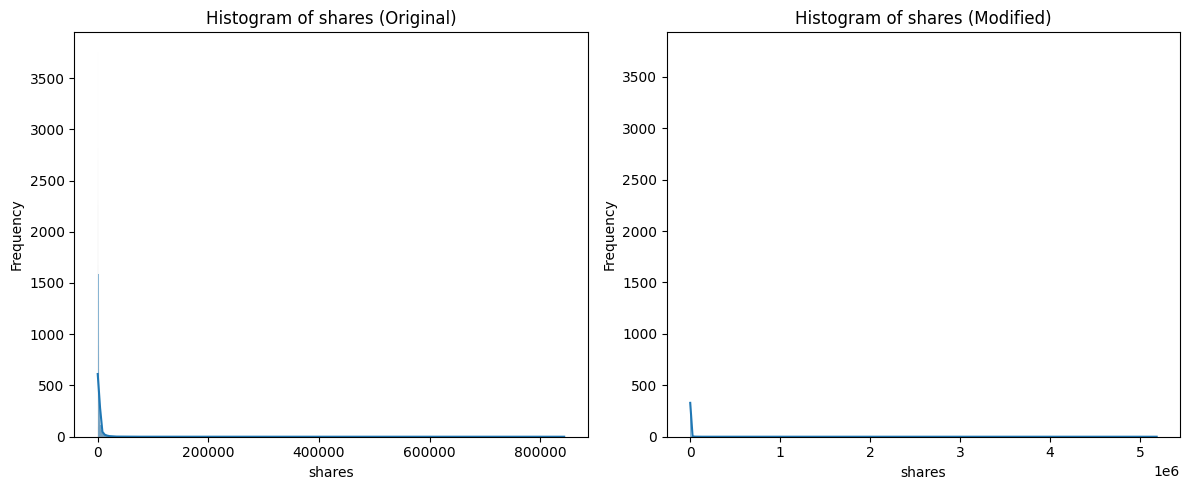

In [63]:
# Histograms for 'shares'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['shares'], kde=True)
plt.title('Histogram of shares (Original)')
plt.xlabel('shares')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['shares'], kde=True)
plt.title('Histogram of shares (Modified)')
plt.xlabel('shares')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

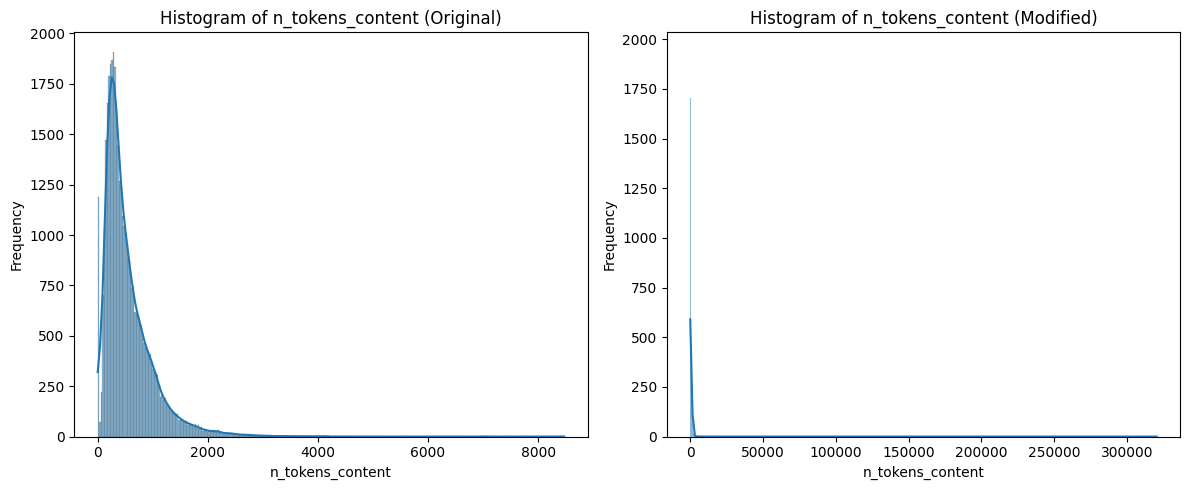

In [64]:
# Histograms for 'n_tokens_content'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['n_tokens_content'], kde=True)
plt.title('Histogram of n_tokens_content (Original)')
plt.xlabel('n_tokens_content')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['n_tokens_content'], kde=True)
plt.title('Histogram of n_tokens_content (Modified)')
plt.xlabel('n_tokens_content')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

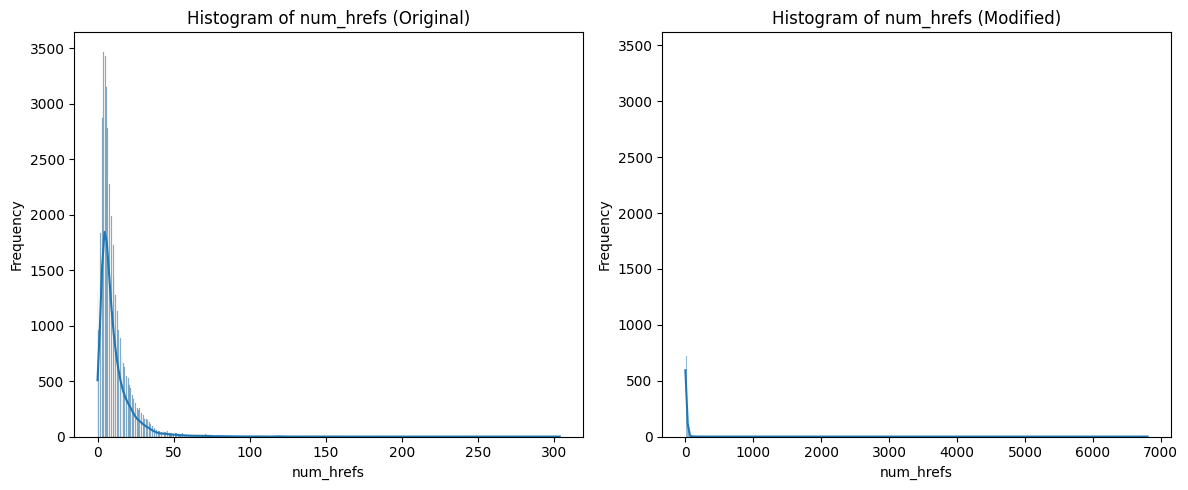

In [65]:
# Histograms for 'num_hrefs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['num_hrefs'], kde=True)
plt.title('Histogram of num_hrefs (Original)')
plt.xlabel('num_hrefs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['num_hrefs'], kde=True)
plt.title('Histogram of num_hrefs (Modified)')
plt.xlabel('num_hrefs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

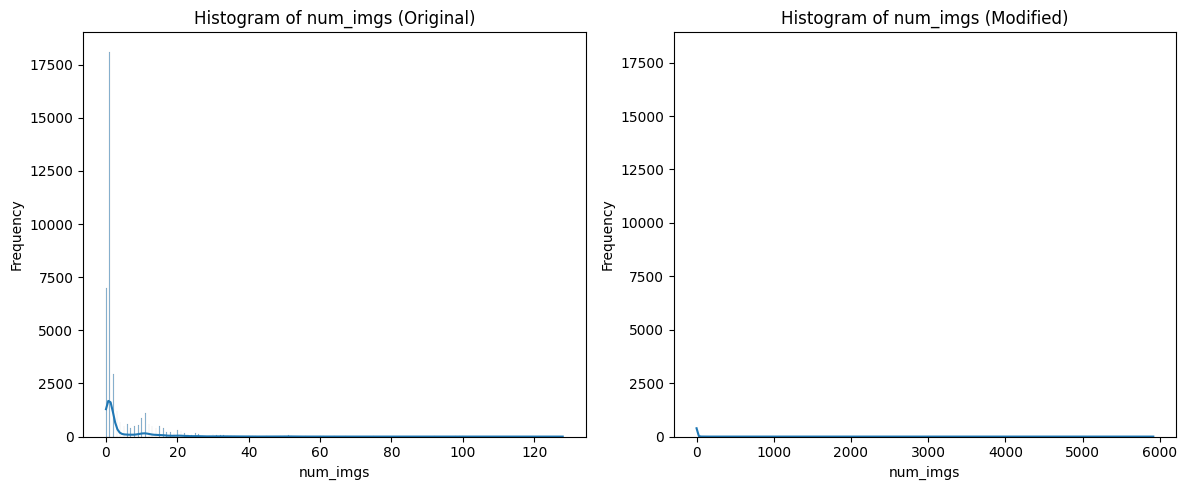

In [66]:
# Histograms for 'num_imgs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['num_imgs'], kde=True)
plt.title('Histogram of num_imgs (Original)')
plt.xlabel('num_imgs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['num_imgs'], kde=True)
plt.title('Histogram of num_imgs (Modified)')
plt.xlabel('num_imgs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

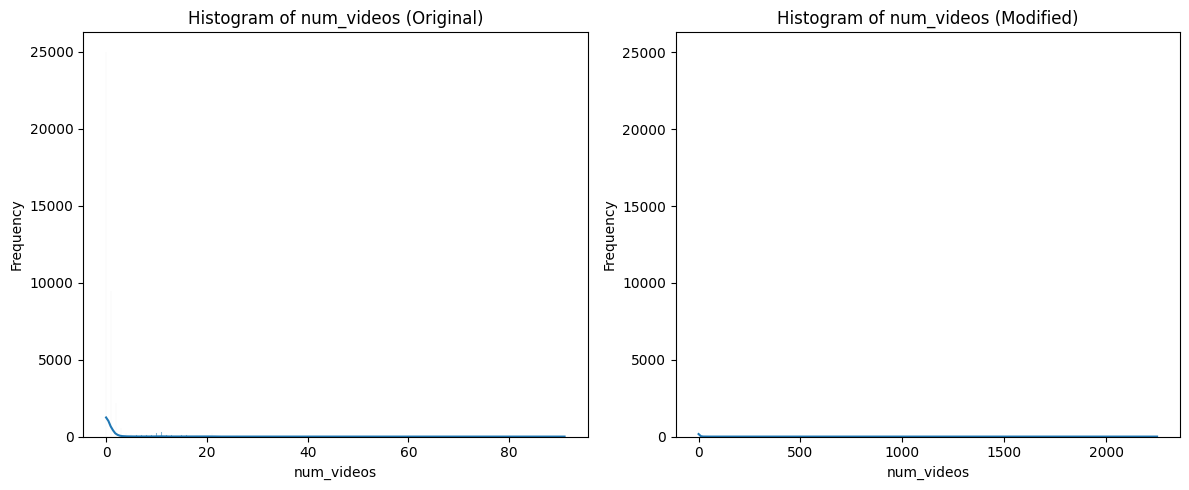

In [67]:
# Histograms for 'num_videos'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['num_videos'], kde=True)
plt.title('Histogram of num_videos (Original)')
plt.xlabel('num_videos')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['num_videos'], kde=True)
plt.title('Histogram of num_videos (Modified)')
plt.xlabel('num_videos')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

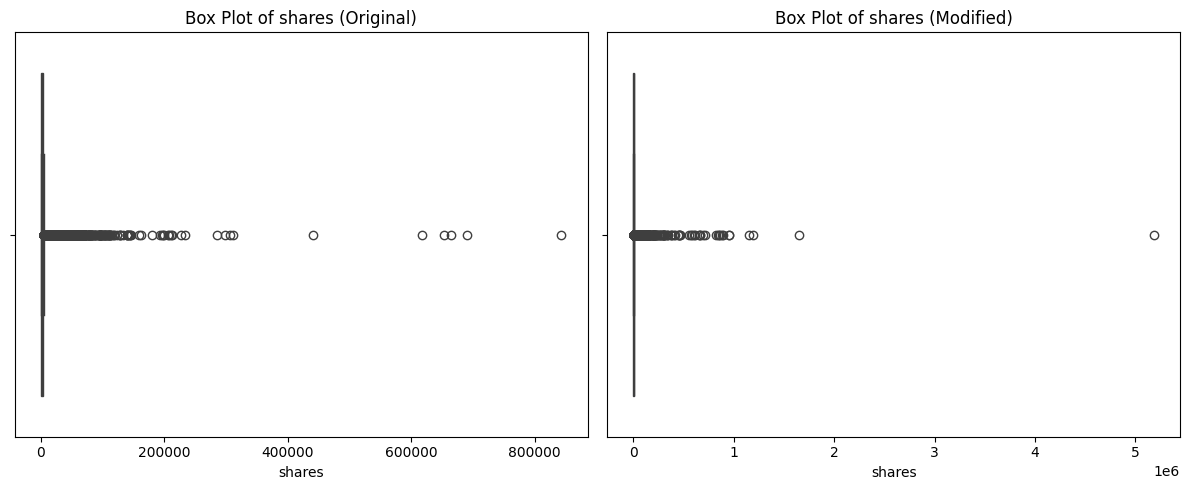

In [68]:
# Box plots for 'shares'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['shares'])
plt.title('Box Plot of shares (Original)')
plt.xlabel('shares')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['shares'])
plt.title('Box Plot of shares (Modified)')
plt.xlabel('shares')
plt.tight_layout()
plt.show()

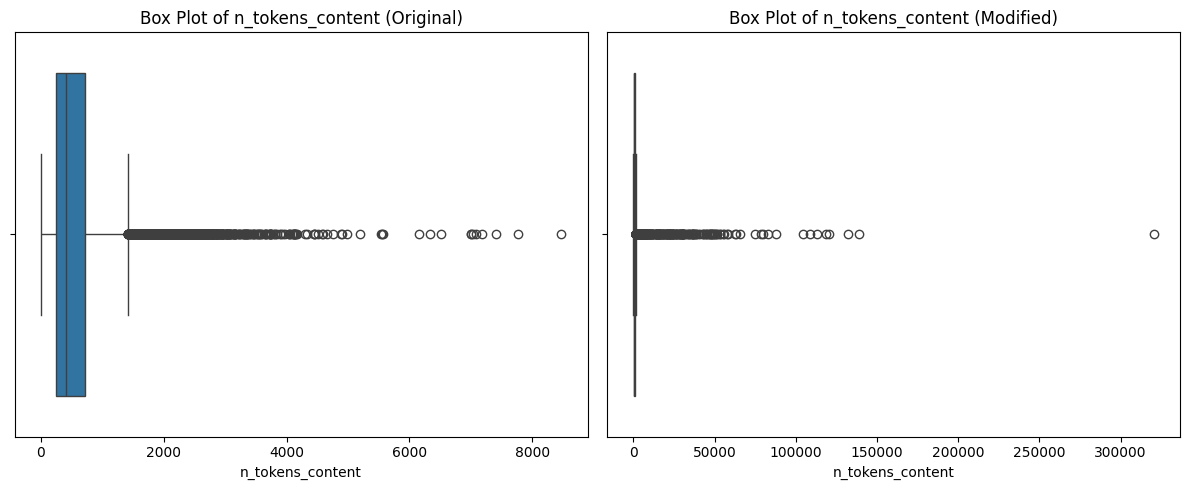

In [69]:
# Box plots for 'n_tokens_content'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['n_tokens_content'])
plt.title('Box Plot of n_tokens_content (Original)')
plt.xlabel('n_tokens_content')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['n_tokens_content'])
plt.title('Box Plot of n_tokens_content (Modified)')
plt.xlabel('n_tokens_content')
plt.tight_layout()
plt.show()

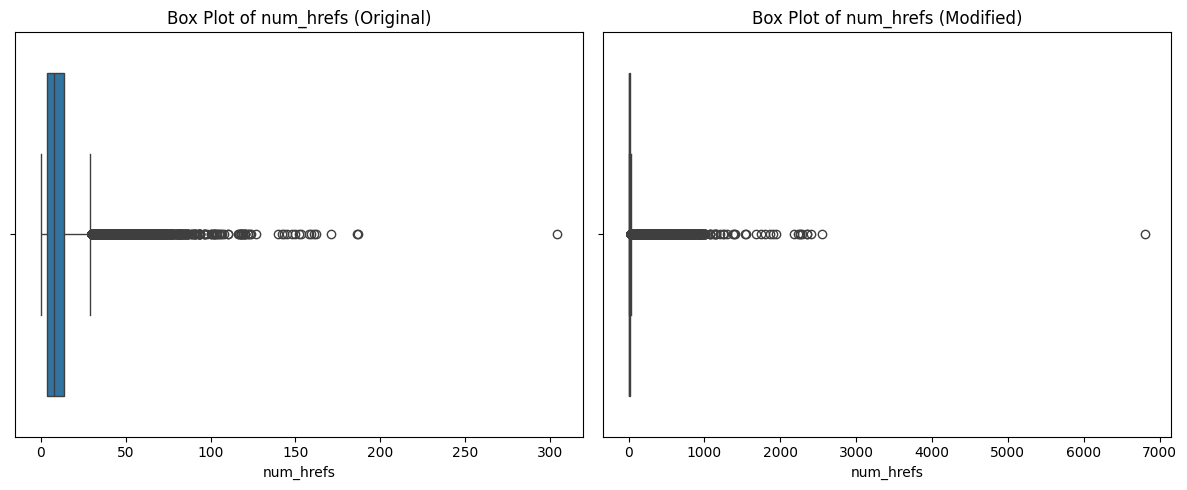

In [70]:
# Box plots for 'num_hrefs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['num_hrefs'])
plt.title('Box Plot of num_hrefs (Original)')
plt.xlabel('num_hrefs')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['num_hrefs'])
plt.title('Box Plot of num_hrefs (Modified)')
plt.xlabel('num_hrefs')
plt.tight_layout()
plt.show()

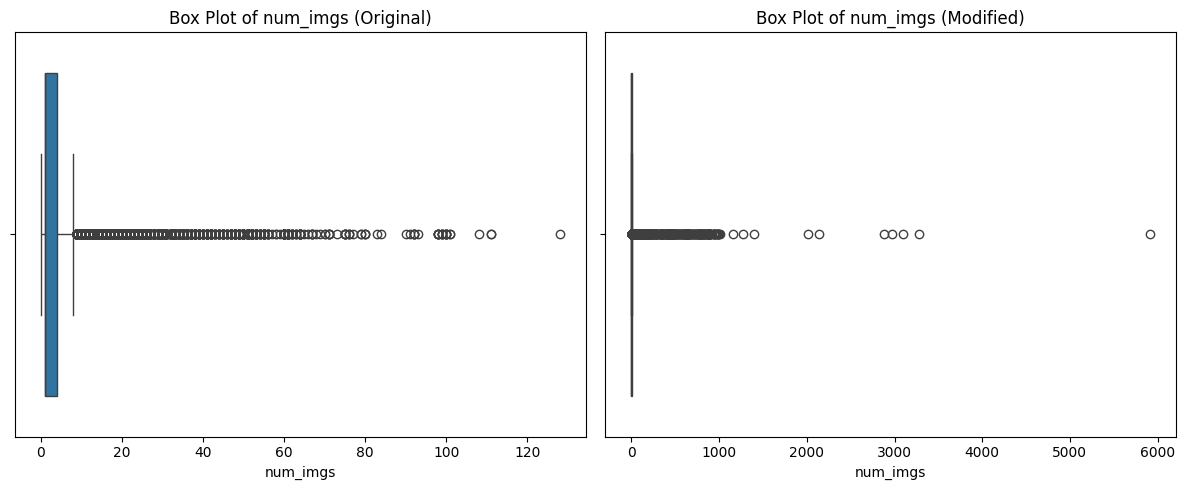

In [71]:
# Box plots for 'num_imgs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['num_imgs'])
plt.title('Box Plot of num_imgs (Original)')
plt.xlabel('num_imgs')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['num_imgs'])
plt.title('Box Plot of num_imgs (Modified)')
plt.xlabel('num_imgs')
plt.tight_layout()
plt.show()

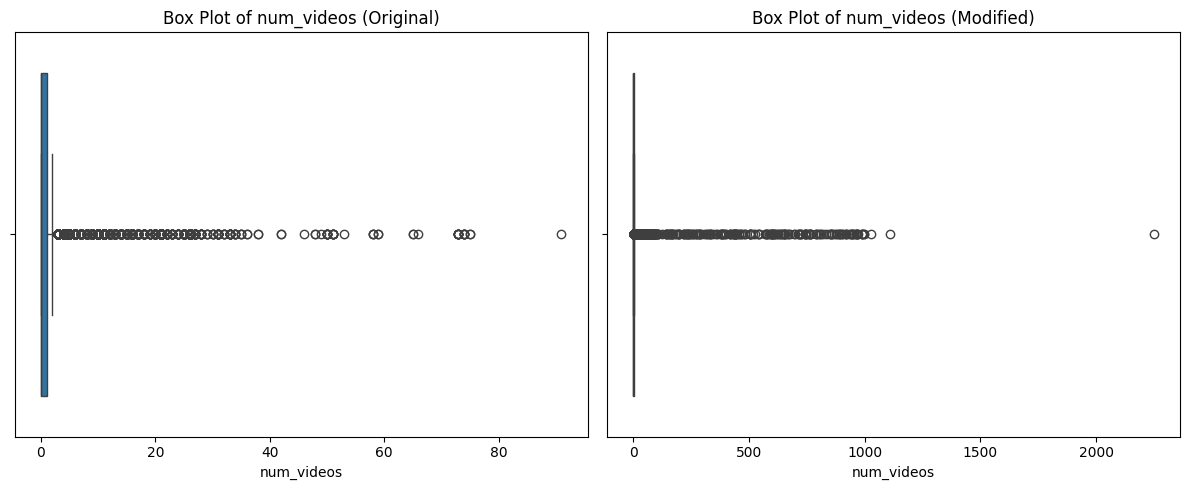

In [72]:
# Box plots for 'num_videos'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['num_videos'])
plt.title('Box Plot of num_videos (Original)')
plt.xlabel('num_videos')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['num_videos'])
plt.title('Box Plot of num_videos (Modified)')
plt.xlabel('num_videos')
plt.tight_layout()
plt.show()

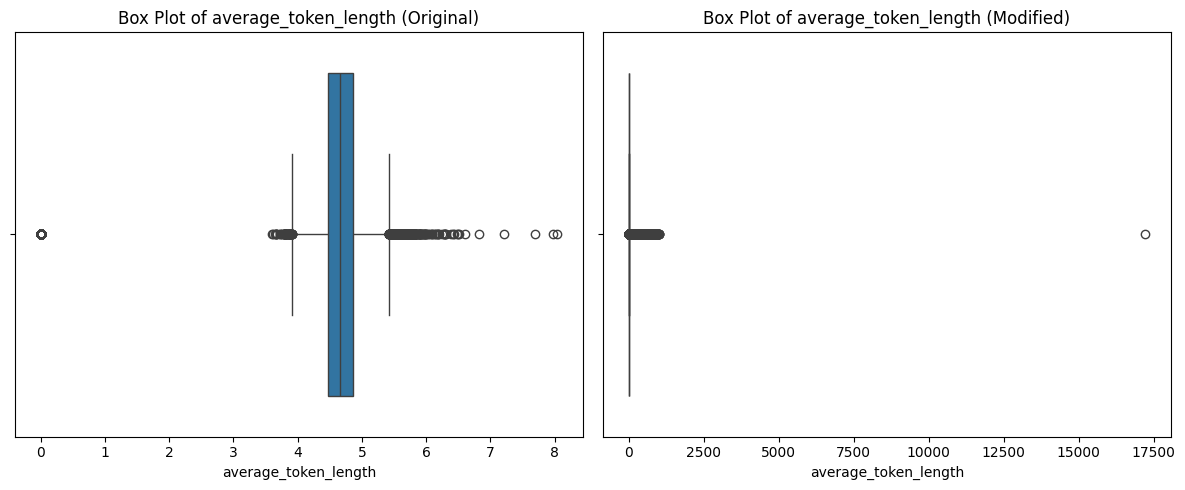

In [73]:
# Box plots for 'average_token_length'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['average_token_length'])
plt.title('Box Plot of average_token_length (Original)')
plt.xlabel('average_token_length')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['average_token_length'])
plt.title('Box Plot of average_token_length (Modified)')
plt.xlabel('average_token_length')
plt.tight_layout()
plt.show()

## Seleccionar variables para preprocesamiento





Identificamos las variables numéricas para normalización y las categóricas para codificación, excluyendo la columna 'url' y 'mixed_type_col' en news_df.



In [74]:
numerical_cols_news = news_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_news = [col for col in numerical_cols_news if col not in ['url', 'mixed_type_col']]

categorical_cols_news = news_df.select_dtypes(include='object').columns.tolist()
categorical_cols_news = [col for col in categorical_cols_news if col not in ['url', 'mixed_type_col']]

numerical_cols_original = original_news_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_original = [col for col in numerical_cols_original if col not in ['url']]

categorical_cols_original = original_news_df.select_dtypes(include='object').columns.tolist()
categorical_cols_original = [col for col in categorical_cols_original if col not in ['url']]

print("Numerical columns in news_df:", numerical_cols_news)
print("Categorical columns in news_df:", categorical_cols_news)
print("Numerical columns in original_news_df:", numerical_cols_original)
print("Categorical columns in original_news_df:", categorical_cols_original)

Numerical columns in news_df: ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'av

## Normalizar variables numéricas

Aplicamos técnicas de normalización a las variables numéricas seleccionadas en ambos dataframes.


In [75]:
from sklearn.preprocessing import StandardScaler

scaler_news = StandardScaler()
news_df[numerical_cols_news] = scaler_news.fit_transform(news_df[numerical_cols_news])

scaler_original = StandardScaler()
original_news_df[numerical_cols_original] = scaler_original.fit_transform(original_news_df[numerical_cols_original])

display(news_df.head())
display(original_news_df.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,0.00971,-0.065647,-0.152580,-0.063363,-0.024378,-0.066179,-0.159849,-0.057236,-0.114726,...,-0.070199,-0.018798,-0.025219,-0.142275,-0.061711,-0.068495,-0.019187,-0.026435,-0.107234,bad
1,http://mashable.com/2013/01/07/ap-samsung-spon...,0.00971,-0.113052,-0.140880,-0.064683,-0.024378,-0.066702,-0.172194,-0.067635,-0.114726,...,-0.070199,-0.017632,-0.021813,-0.060021,-0.072901,-0.063859,-0.017208,-0.027841,-0.103888,639
2,http://mashable.com/2013/01/07/apple-40-billio...,0.00971,-0.113052,-0.155179,-0.065348,-0.024378,-0.069563,-0.172194,-0.067635,-0.114726,...,-0.063557,-0.019385,-0.026653,-0.060852,-0.072901,-0.063859,-0.017208,-0.027841,-0.081514,unknown
3,http://mashable.com/2013/01/07/astronaut-notre...,0.00971,-0.113052,-0.051181,-0.066948,-0.024378,-0.069523,-0.098121,-0.078034,-0.114726,...,-0.067985,-0.018897,-0.025219,-0.061683,-0.072901,-0.063859,-0.017208,NaN,-0.090021,688
4,http://mashable.com/2013/01/07/att-u-verse-apps/,0.00971,-0.049845,0.124642,-0.068926,-0.024378,-0.072309,0.025335,0.119553,0.178767,...,-0.063557,-0.018144,NaN,-0.058775,-0.062728,-0.060487,-0.019007,-0.026819,-0.109730,579


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,http://mashable.com/2013/01/07/ap-samsung-spon...,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,http://mashable.com/2013/01/07/apple-40-billio...,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,http://mashable.com/2013/01/07/astronaut-notre...,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,http://mashable.com/2013/01/07/att-u-verse-apps/,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596


## Codificar variables categóricas

Aplicamos codificación one-hot a las variables categóricas seleccionadas en ambos dataframes.


In [76]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to news_df categorical columns
news_categorical_encoded = ohe.fit_transform(news_df[categorical_cols_news])
news_categorical_df = pd.DataFrame(news_categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols_news))

# Apply one-hot encoding to original_news_df categorical columns
original_news_categorical_encoded = ohe.fit_transform(original_news_df[categorical_cols_original])
original_news_categorical_df = pd.DataFrame(original_news_categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols_original))

display(news_categorical_df.head())
display(original_news_categorical_df.head())

""
0
1
2
3
4


""
0
1
2
3
4


## Reducción de dimensionalidad

Consideramos la aplicación de una técnica de reducción de dimensionalidad ( PCA) si el número de características es muy alto después de la codificación. Evaluar si es necesaria basándose en el análisis exploratorio de datos.


**Reasoning**:
Check the number of columns in both dataframes to determine if dimensionality reduction is necessary.



In [77]:
print("Number of columns in news_df:", news_df.shape[1])
print("Number of columns in original_news_df:", original_news_df.shape[1])

Number of columns in news_df: 62
Number of columns in original_news_df: 61


## Resumen hasta ahora:

### Hallazgos del análisis de datos

*   Las variables numéricas tanto en `news_df` como en `original_news_df` se normalizaron exitosamente usando `StandardScaler`.
*   El paso de one-hot encoding dio como resultado dataframes vacios porque no hay varables categoricas.
*   La reducción de dimensionalidad se puede considerar innecesaria ya que el número de features (60) no se consideró excesivamente alto.


